# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
#example to see json response
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
city_url = f"{url}q=london&appid={weather_api_key}&units=metric"

response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 26.39,
  'feels_like': 26.39,
  'temp_min': 24.16,
  'temp_max': 28.38,
  'pressure': 1016,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 1.79, 'deg': 149, 'gust': 2.68},
 'clouds': {'all': 0},
 'dt': 1719313800,
 'sys': {'type': 2,
  'id': 2093698,
  'country': 'GB',
  'sunrise': 1719287065,
  'sunset': 1719346910},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#Endpoint:
#- Please, use the endpoint api.openweathermap.org for your API calls
#- Example of API call:
#api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=80607f5cc5acd4b25548715285a5affb

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    #pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | ulladulla
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | emerald
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | masterton
Processing Record 9 of Set 1 | litija
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ta'if
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | queenstown
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | tshikapa
Processing Record 22 of Set 1 | kingston
Processing Record 23 of Set 1 | adam

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,7.11,91,100,2.40,SJ,1719312636
1,ulladulla,-35.3500,150.4667,10.83,71,7,2.42,AU,1719312747
2,port-aux-francais,-49.3500,70.2167,4.27,98,100,6.70,TF,1719312749
3,emerald,-23.5333,148.1667,19.08,64,92,5.64,AU,1719312750
4,qaqortoq,60.7167,-46.0333,2.92,87,94,1.63,GL,1719312752


In [18]:
from pathlib import Path

# Create a new folder called "output_data" in the current working directory
output_folder = Path("output_data")
output_folder.mkdir(exist_ok=True)

# Define the path for the CSV file
output_path = output_folder / "cities.csv"
    
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,7.11,91,100,2.40,SJ,1719312636
1,ulladulla,-35.3500,150.4667,10.83,71,7,2.42,AU,1719312747
2,port-aux-francais,-49.3500,70.2167,4.27,98,100,6.70,TF,1719312749
3,emerald,-23.5333,148.1667,19.08,64,92,5.64,AU,1719312750
4,qaqortoq,60.7167,-46.0333,2.92,87,94,1.63,GL,1719312752


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

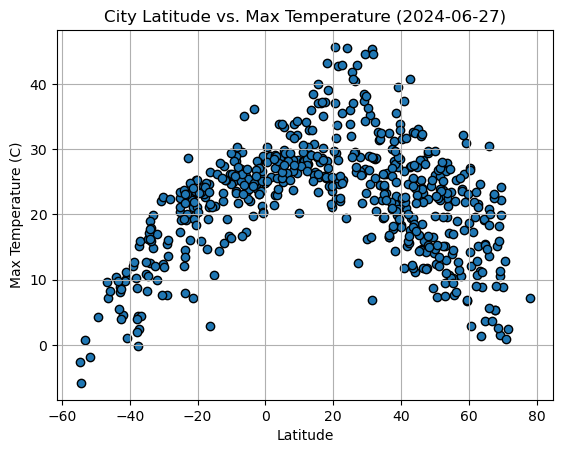

In [107]:
import datetime

current_date = datetime.datetime.now().strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.title(f"City Latitude vs. Max Temperature ({current_date})")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

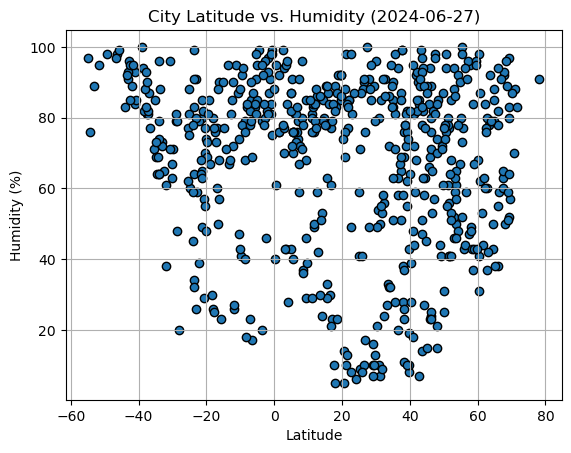

In [108]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.title(f"City Latitude vs. Humidity ({current_date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

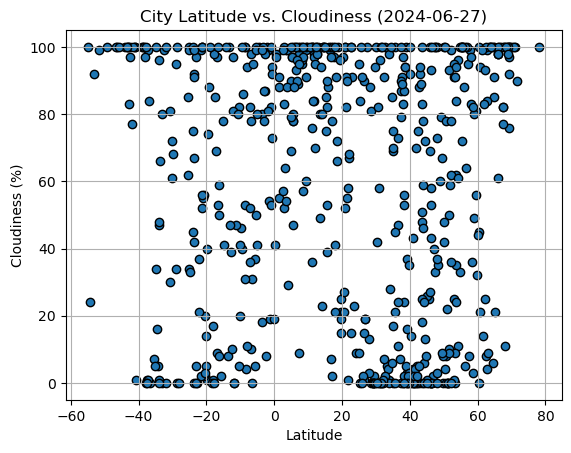

In [109]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness ({current_date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

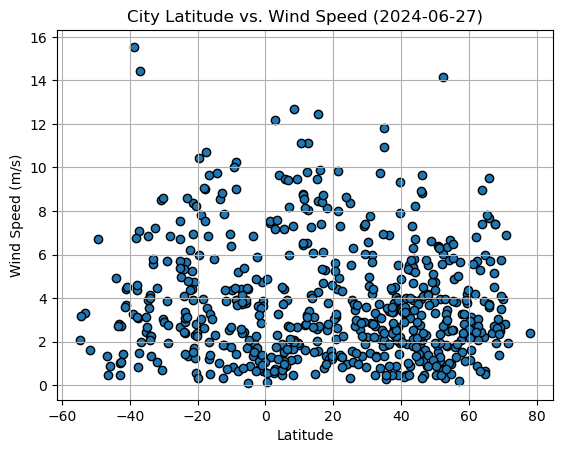

In [110]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed ({current_date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel='X-axis', ylabel='Y-axis', title='Linear Regression Plot'):

    # Convert data to numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Predict y values
    y_pred = x * slope +intercept
    
    # Print the linear regression values
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}")
    
    # Plot the data points
    plt.scatter(x, y)
    
    # Plot the regression line
    plt.plot(x, y_pred, color='red', label='Regression line')
    
    # Annotate the plot with the regression equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=15,color="red")
    plt.title(title)
    
    # Show the plot
    plt.show()
    

In [112]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,7.11,91,100,2.40,SJ,1719312636
4,qaqortoq,60.7167,-46.0333,2.92,87,94,1.63,GL,1719312752
5,albany,42.6001,-73.9662,17.58,85,0,0.89,US,1719312753
6,ilulissat,69.2167,-51.1000,1.50,97,100,2.47,GL,1719312755
8,litija,46.0586,14.8225,25.34,69,69,3.97,SI,1719312758


In [113]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ulladulla,-35.3500,150.4667,10.83,71,7,2.42,AU,1719312747
2,port-aux-francais,-49.3500,70.2167,4.27,98,100,6.70,TF,1719312749
3,emerald,-23.5333,148.1667,19.08,64,92,5.64,AU,1719312750
7,masterton,-40.9597,175.6575,10.06,93,100,3.66,NZ,1719312756
10,saldanha,-33.0117,17.9442,14.91,73,0,5.55,ZA,1719312761


###  Temperature vs. Latitude Linear Regression Plot

Slope: -0.2592071637917299
Intercept: 33.310247475881106
R-squared: 0.34905389668617937
P-value: 3.197961437218734e-40
Standard Error: 0.017460326462903922


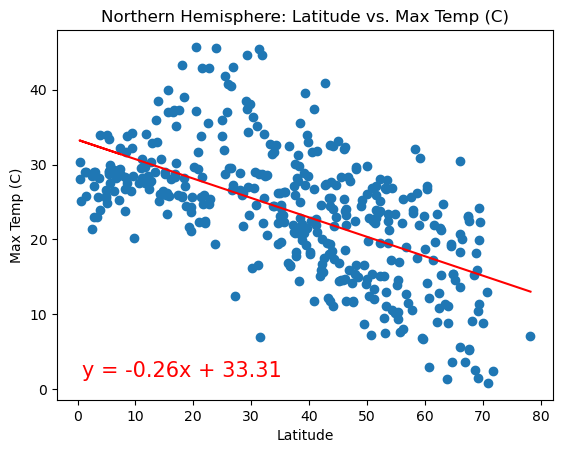

In [114]:
# Linear regression on Northern Hemisphere

plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    xlabel='Latitude',
    ylabel='Max Temp (C)',
    title='Northern Hemisphere: Latitude vs. Max Temp (C)'
)

Slope: 0.4632964820716912
Intercept: 28.48101880007591
R-squared: 0.6441693797244417
P-value: 1.795642345596179e-42
Standard Error: 0.02559418680445853


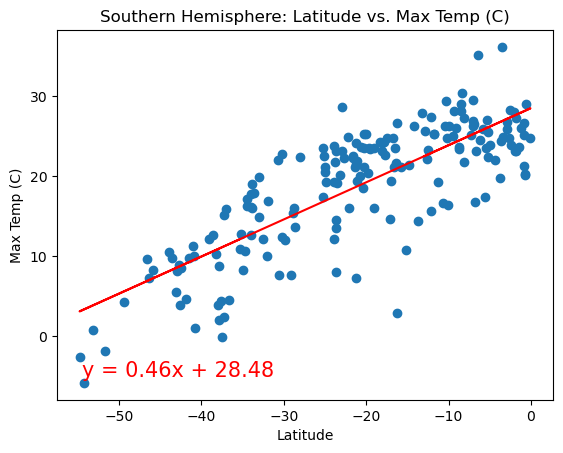

In [115]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    xlabel='Latitude',
    ylabel='Max Temp (C)',
    title='Southern Hemisphere: Latitude vs. Max Temp (C)'
)

**Discussion about the linear relationship:** The Northern Hemisphere shows moderate, negative, slightyly linear relationship between latitude and max temperature whereas the Southern Hemisphere shows a stronger, positive and more linear relationship between latitude and max temperature. This would indicate for the Northern Hemisphere as latitude increase the max temperature decrease while in the Southern Hemisphere, as the latitude decreases (if the axes was reversed) the temperate would also decrease. this makes sense as the more north and south you go from the equator, the more the max temperature increases as you approach the North and South Poles.
Additionally, the r^2 value of the Northern Hemisphere is approx. 0.35 indicating that 35% of the variation in the max temperature can be explained by the variation in latitude. The r^2 value of the Southern Hemisphere is approx. 0.64 indicating that 64% of the ariation in the max temperature can be explained by the variation in latitude which is higher than the Northern Hemisphere. The linear relationship in the Southern Hemisphere shows more conclusive evidence compared to the Northern Hemisphere.
However, there may be some limitations in the data as the number of cities in the Northern Hemisphere seems to be higher than the Southern Hemisphere which could impact the results. If there was same amount of cities in both hemisphere we may get a more accurate result to compare but there are also other factors that may impact our results as well.

### Humidity vs. Latitude Linear Regression Plot

Slope: 0.021050935571485744
Intercept: 64.2879889214775
R-squared: 0.0002597390029406989
P-value: 0.7440060775042381
Standard Error: 0.06442070861141454


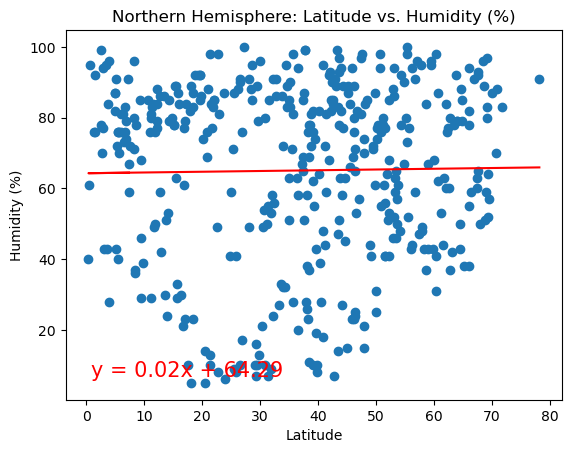

In [116]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='Northern Hemisphere: Latitude vs. Humidity (%)'
)

Slope: -0.19730742793266937
Intercept: 70.02653476910496
R-squared: 0.018146111492709213
P-value: 0.06904909025735674
Standard Error: 0.10787872191525234


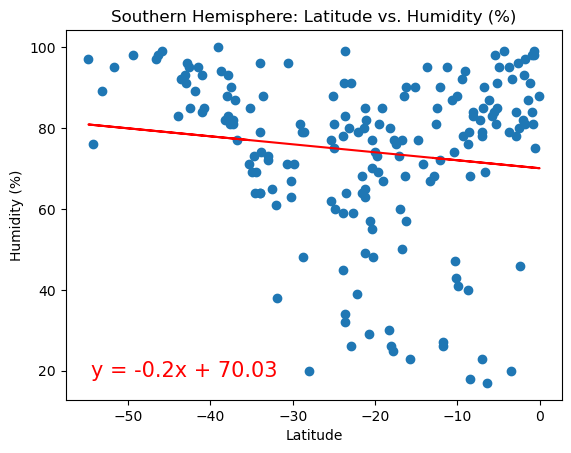

In [117]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='Southern Hemisphere: Latitude vs. Humidity (%)'
)

**Discussion about the linear relationship:** The Northern Hemisphere shows a positive, weak, non-linear relationship between latitude and humidity whereas the Southern Hemisphere shows a negative, weak, non-linear relationship between the two variables. The r^2 value of both hemisphere is very weak with approx. 0.00026 for the Northern Hemisphere and approx. 0.018 for the Southern Hemisphere, which is larger than the Northern but still relatively weak overall. Both the Northern and Southern Hemispheres show very weak and statistically insignificant relationships between latitude and humidity suggesting that latitude and hemisphere are not a good predictor of humidity in either hemisphere. A transformation could be applied to show a more linear relationship to verify if there is any potential correaltion between the 2 varaibles.

### Cloudiness vs. Latitude Linear Regression Plot

Slope: -0.23036936062107513
Intercept: 66.769319659795
R-squared: 0.01282349086363327
P-value: 0.021348737145493752
Standard Error: 0.09970067045662977


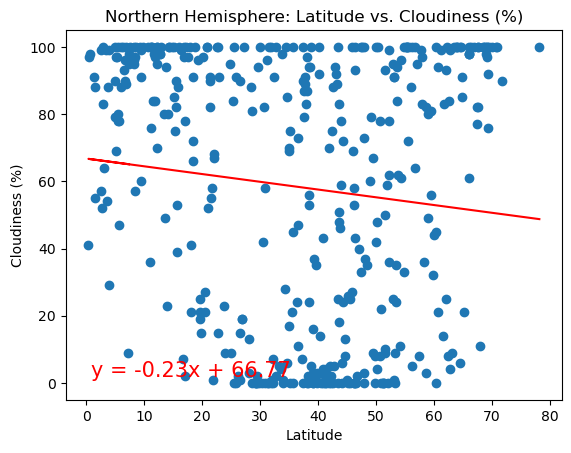

In [118]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='Northern Hemisphere: Latitude vs. Cloudiness (%)'
)

Slope: -0.19124623148159556
Intercept: 54.19272454506276
R-squared: 0.004647722823658875
P-value: 0.35914701699637974
Standard Error: 0.20802804888334472


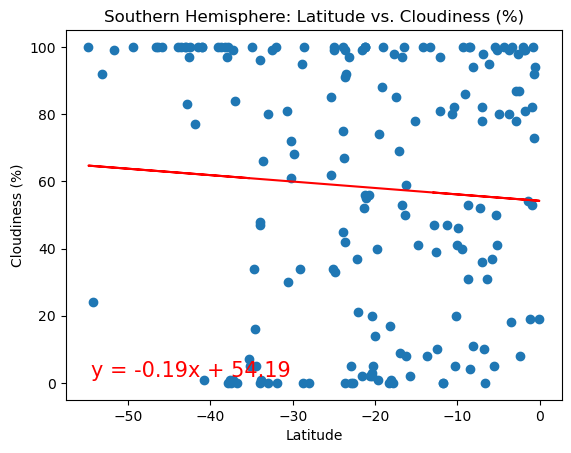

In [119]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='Southern Hemisphere: Latitude vs. Cloudiness (%)'
)

**Discussion about the linear relationship:** The Northern Hemisphere shows a weak, negative, non-linear relationship between latitude and cloudiness. The Southern Hemisphere also shows a weak, negative, non-linear relationship between latitude and cloudiness indicating that both hemispheres have a similar distribution. The r^2 value of both hemisphere is very weak with approx. 0.0123 for the Northern Hemisphere and approx. 0.0046 for the Southern Hemisphere, which is smaller than the Northern but both are still relatively weak overall. Both the Northern and Southern Hemispheres show very weak and statistically insignificant relationships between latitude and cloudiness suggesting that latitude and hemisphere are not a good predictor of cloudiness in either hemisphere. A transformation could be applied to show a more linear relationship to verify if there is any potential correaltion between the 2 varaibles though I am not sure of any transformation that could linearlise this data.

### Wind Speed vs. Latitude Linear Regression Plot

Slope: -0.014541356283371267
Intercept: 4.25681829676274
R-squared: 0.011304579988699047
P-value: 0.03074816679236127
Standard Error: 0.006707922711661382


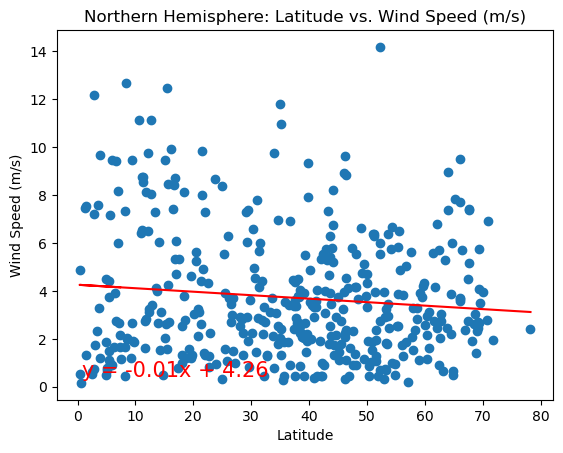

In [120]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='Northern Hemisphere: Latitude vs. Wind Speed (m/s)'
)

Slope: -0.008424745444805815
Intercept: 3.746926412986108
R-squared: 0.0017815108511956314
P-value: 0.5704974690672704
Standard Error: 0.014822998643440222


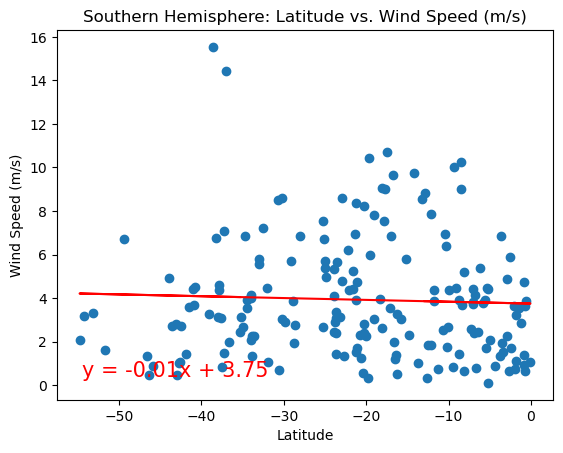

In [121]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='Southern Hemisphere: Latitude vs. Wind Speed (m/s)'
)

**Discussion about the linear relationship:** The Northern Hemisphere shows a weak, negative, non-linear relationship between latitude and wind speed. The Southern Hemisphere also shows a weak, negative, non-linear relationship between latitude and wind speed indicating that both hemispheres have a similar distribution. The r^2 value of both hemisphere is very weak with approx. 0.0113 for the Northern Hemisphere and approx. 0.0018 for the Southern Hemisphere, which is smaller than the Northern but both are still relatively weak overall. Both the Northern and Southern Hemispheres show very weak and statistically insignificant relationships between latitude and wind speed suggesting that latitude and hemisphere are not a good predictor of wind speed in either hemisphere. A transformation could be applied to show a more linear relationship to verify if there is any potential correaltion between the 2 varaibles though I am not sure of any transformation that could linearlise this data.